# Chapter 11: Trustworthy time series

For additional context see chapter 11 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get data

In [2]:
# Dataset URL
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/09-vienna-general-dublin-maternity-death-to-birth-ratios-data.csv'

# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()

# Drop 'Note' column
df.drop(columns='Note')
# Make 'Year' column dtype string
df['Year'] = df['Year'].astype('string')

# Show head of df
df.head()

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,Vienna General Hospital,1784,284,6,2.1,No pathological anatomy
1,Vienna General Hospital,1785,899,13,1.4,NaN
2,Vienna General Hospital,1786,1151,5,0.4,NaN
3,Vienna General Hospital,1787,1407,5,0.4,NaN
4,Vienna General Hospital,1788,1425,5,0.4,NaN


## Split dataframe by hospital

In [3]:
# Split dataframe into Vienna General (vg) and Dublin General (dg)
vg_df = df[df['Hospital'] == 'Vienna General Hospital']
dg_df = df[df['Hospital'] == 'Dublin Maternity Hospital']

## Fig 11.1: Time series of Vienna General ratios

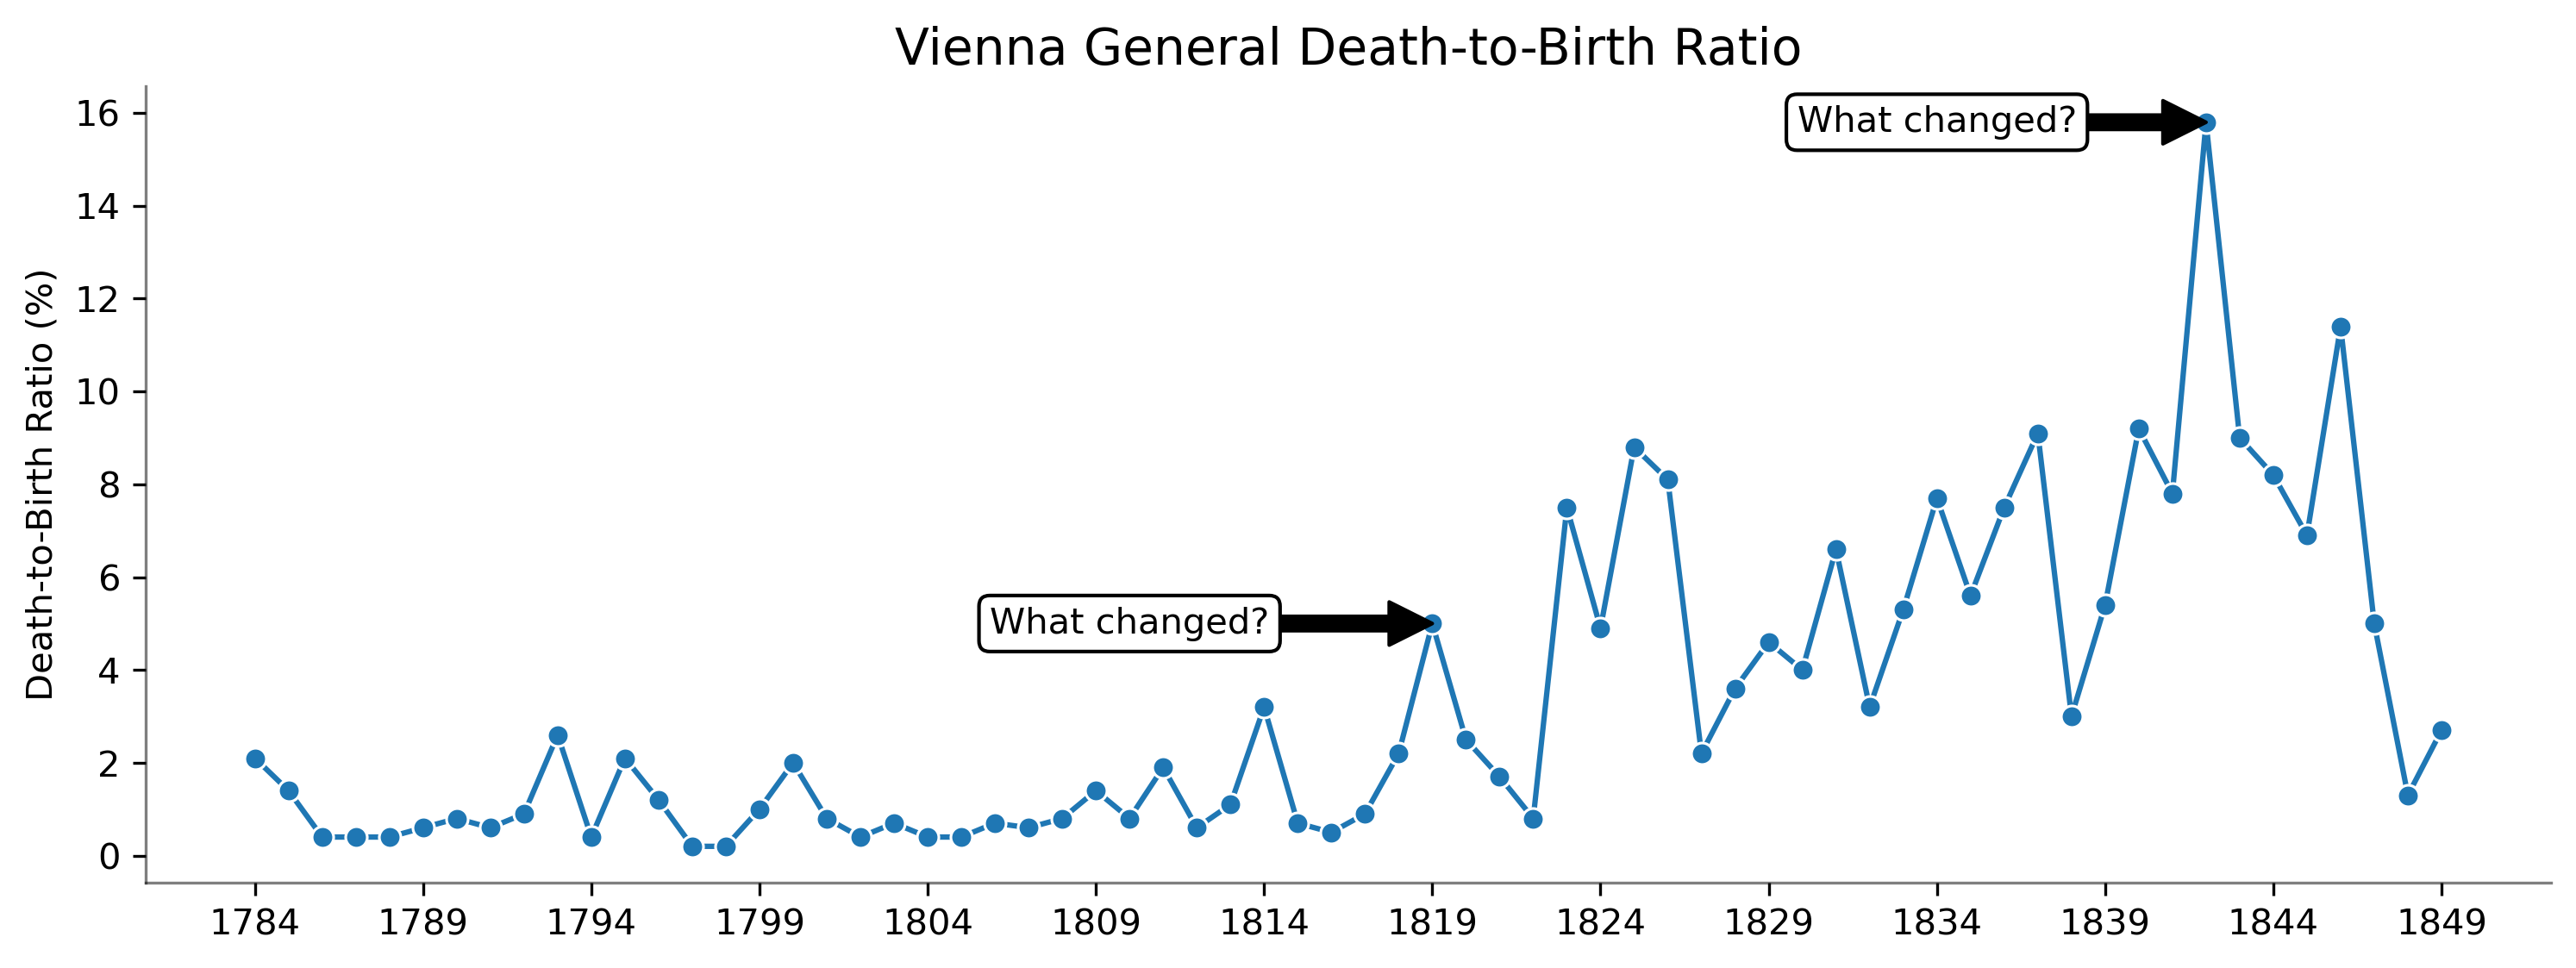

In [8]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in lineplot
sns.lineplot(vg_df, 
             x='Year', 
             y='Death-to-Birth Ratio', 
             marker='o')

# Set the x-tick labels with increased intervals
labels = vg_df['Year']
tick_interval = 5
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Add title
plt.title('Vienna General Death-to-Birth Ratio', fontsize=14)

# Define details for annotations (text, xy-coordinates, xytext-coordinates)
annotations = [
    ('What changed?', (58,15.8), (50,15.8)),
    ('What changed?', (35,5), (26,5))
    ]

# Add annotations using a loop
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=10,
                bbox=dict(facecolor='white', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Ratio (%)')
ax.set_xlabel('')
    
# Show plot
plt.show()

## Fig 11.2: Time series with expanded vertical scale

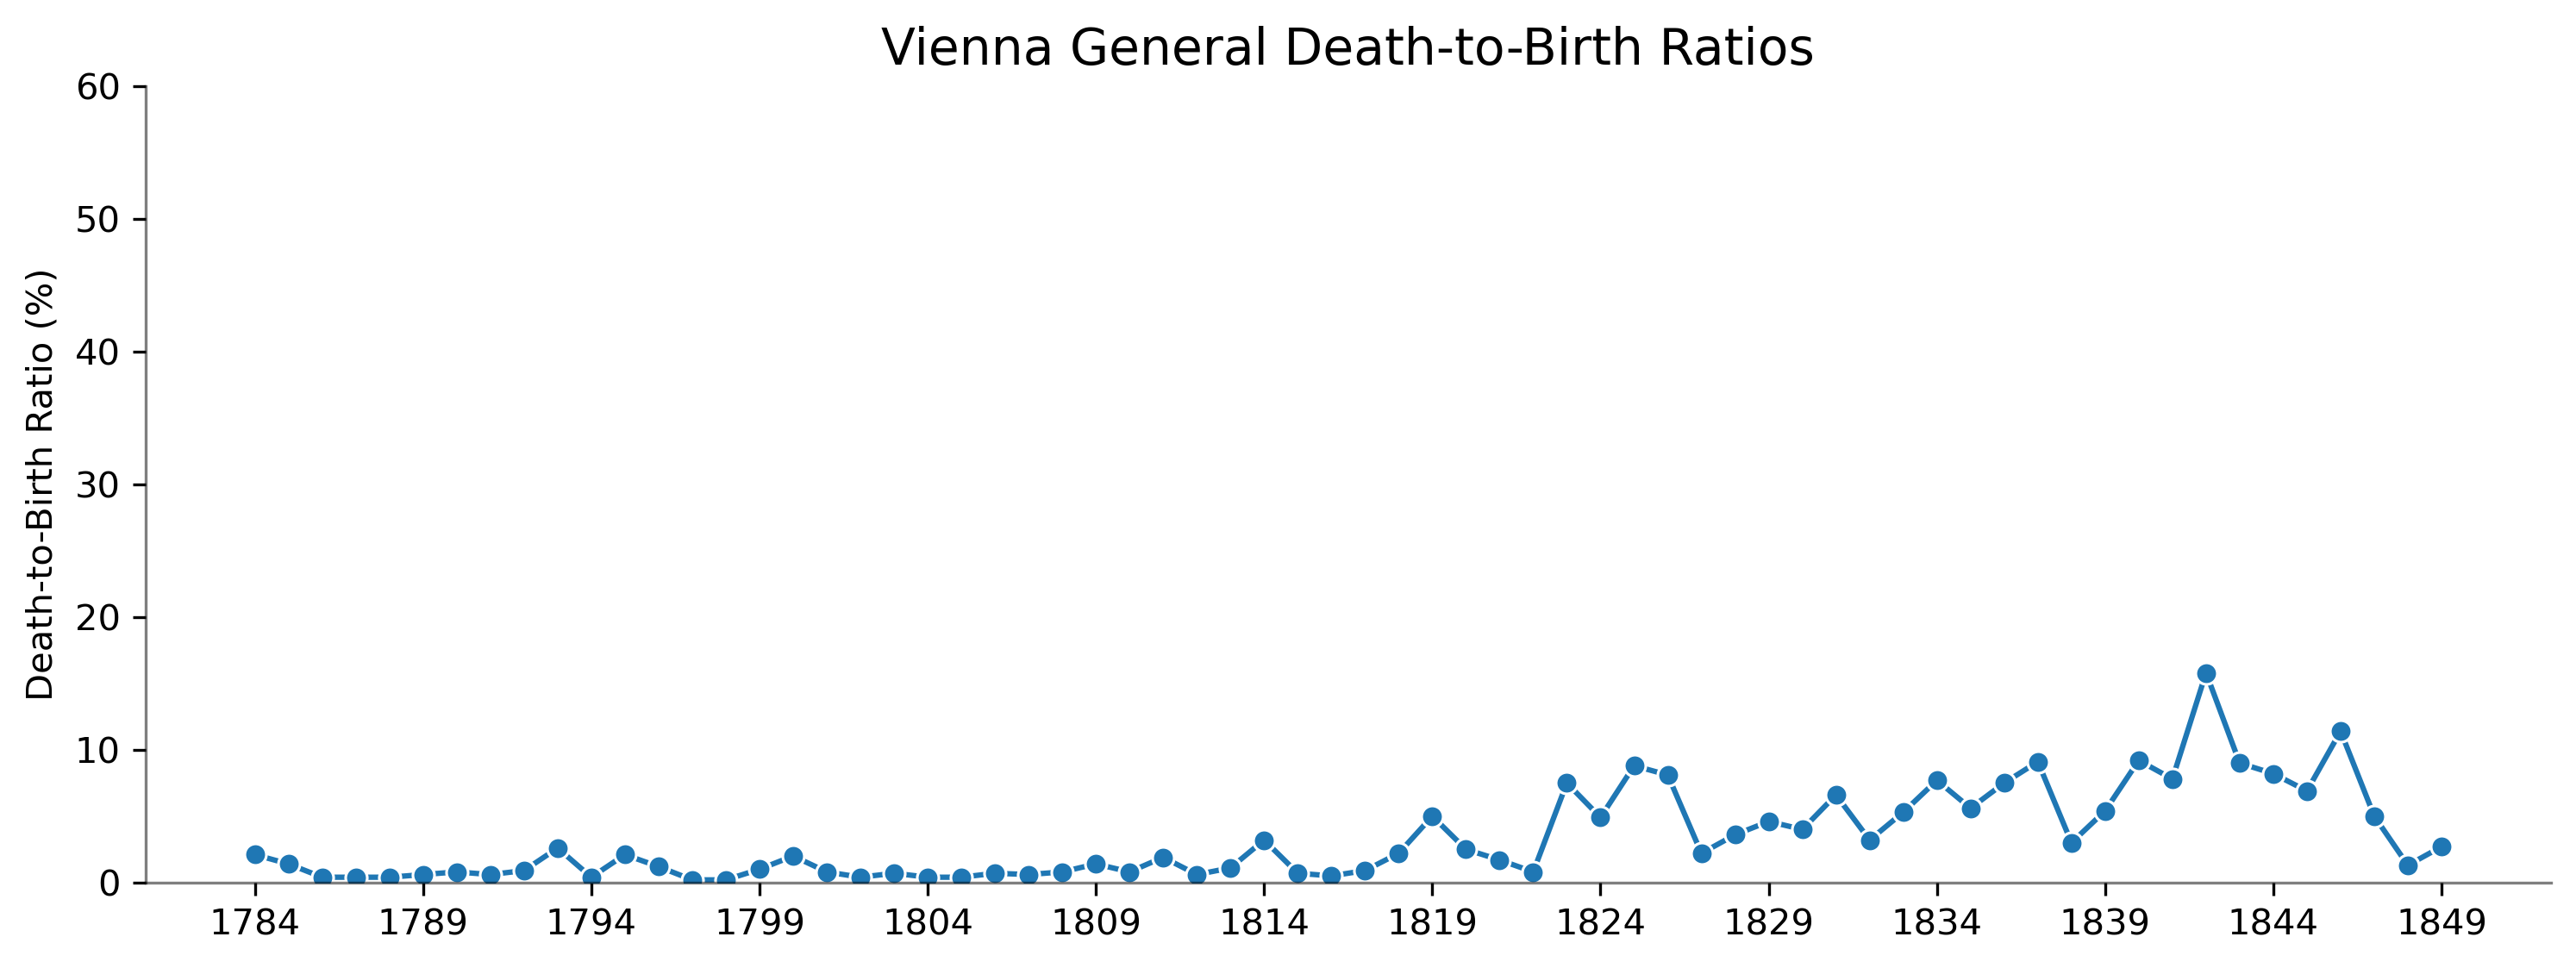

In [9]:
# Indivudal time series with fixed vertical scale
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

sns.lineplot(vg_df, 
             x='Year', 
             y='Death-to-Birth Ratio', 
             marker='o')

# Set y-axis limits
ax.set_ylim(0,60)

# Set the x-tick labels with increased intervals
labels = vg_df['Year']
tick_interval = 5
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Add title
plt.title('Vienna General Death-to-Birth Ratios', fontsize=14)

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)
# Additional formatting
ax.set_ylabel('Death-to-Birth Ratio (%)')
ax.set_xlabel('')

# Show plot
plt.show()

## Fig 11.3: Comparing time series

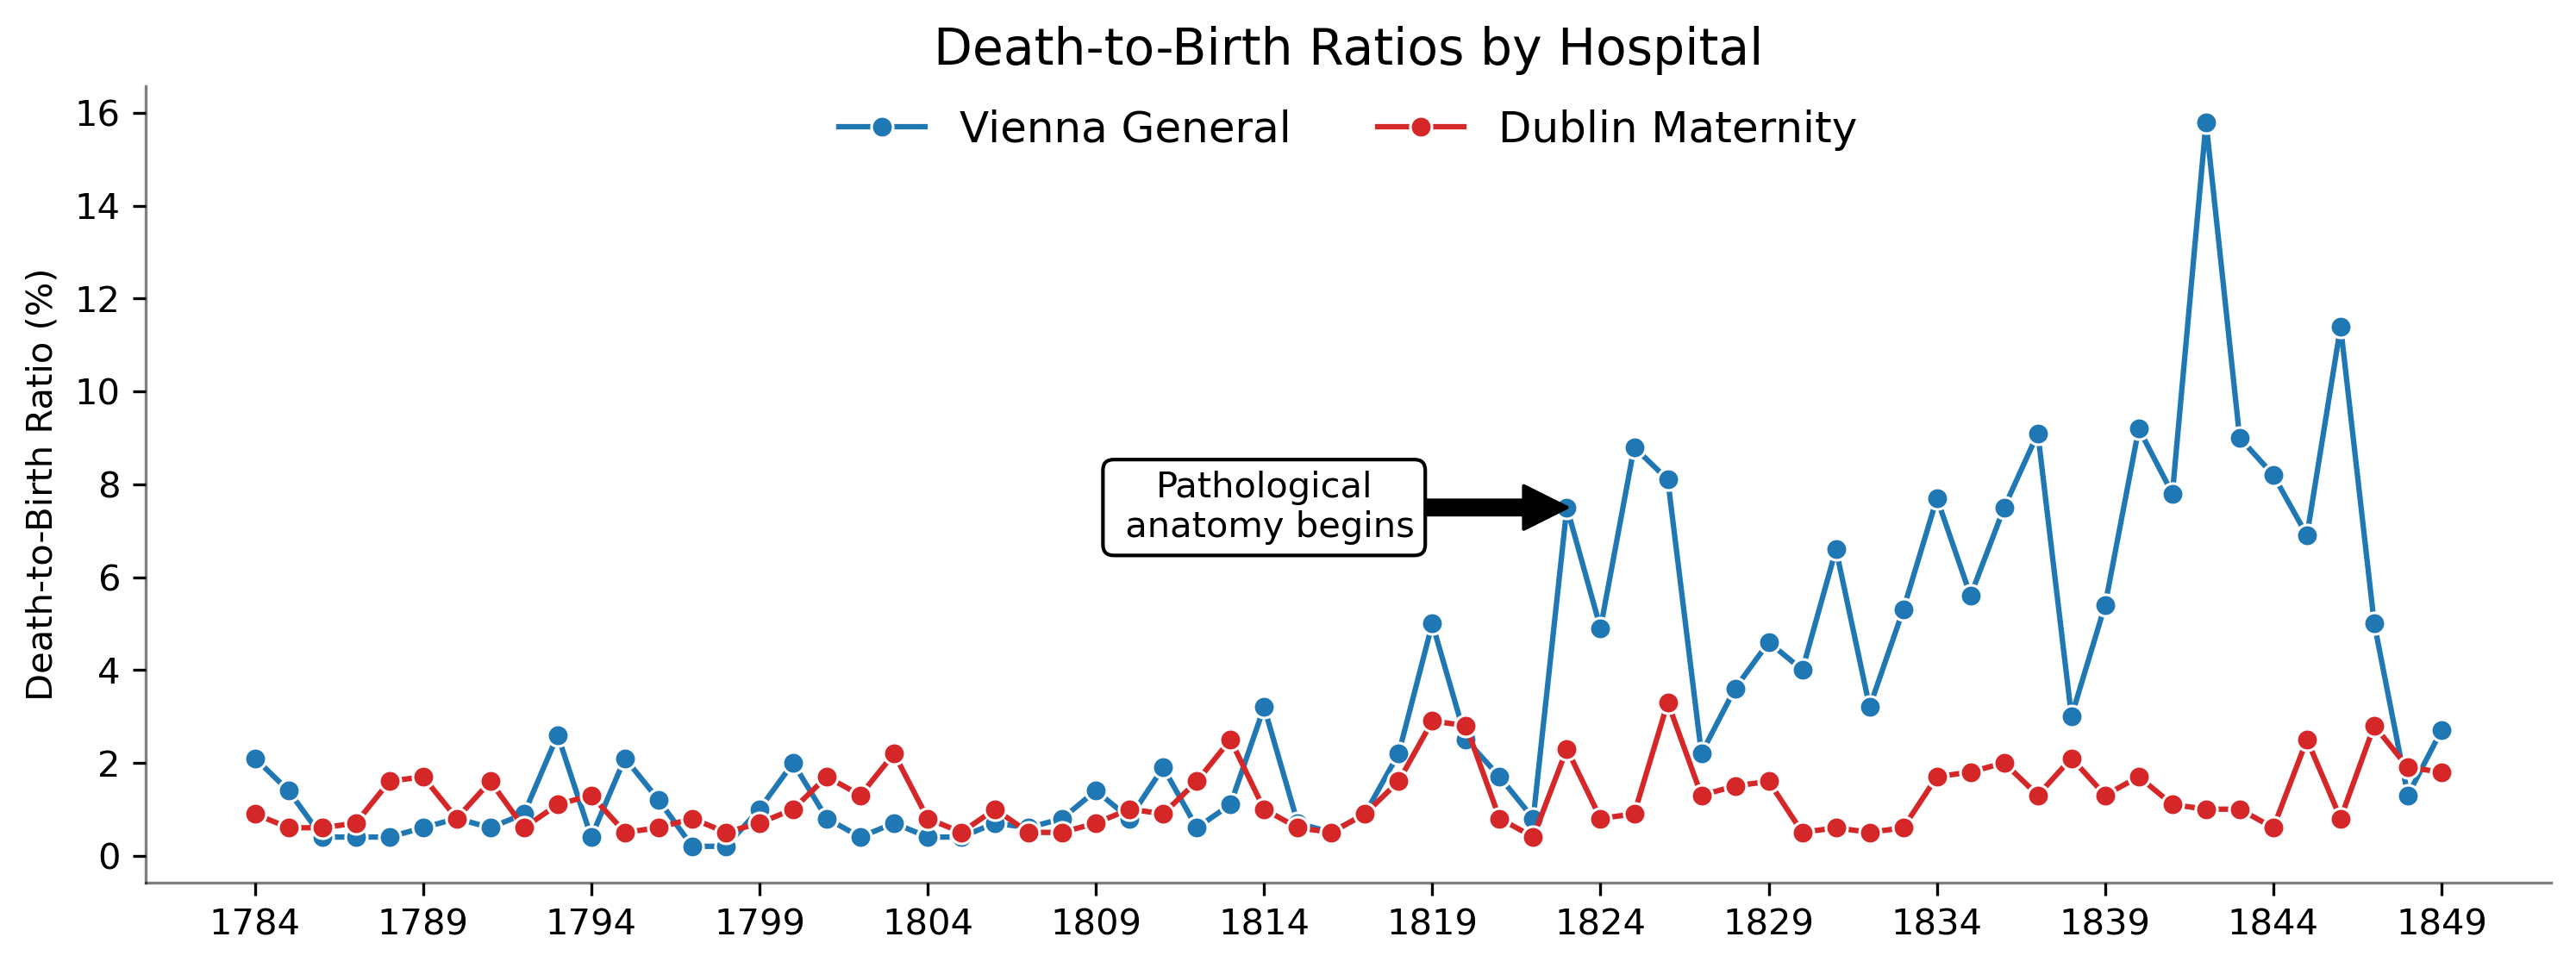

In [12]:
# Vienna General and Dublin General time series
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot Vienna data
sns.lineplot(vg_df, 
             x='Year', 
             y='Death-to-Birth Ratio', 
             marker='o', 
             label='Vienna General')
# Plot Dublin data
sns.lineplot(dg_df, 
             x='Year', 
             y='Death-to-Birth Ratio', 
             marker='o', 
             color='tab:red', 
             label='Dublin Maternity')

# Add title
plt.title('Death-to-Birth Ratios by Hospital', fontsize=14)

# Customize the legend
ax.legend(
    title="",        # Remove the legend title
    loc="upper center",   # Place the legend at the top center
    bbox_to_anchor=(0.5, 1.02),  # Adjust the placement to center it
    ncol=2,           # Place the legend items in 2 columns (horizontal layout)
    fontsize=12,       # Optional: Adjust the legend font size
    frameon=False
)

# Annotation for when pathological anatomy began
ax.annotate("Pathological\n anatomy begins",
           xy=(39,7.5), 
            xytext=(30,7.5),
            ha='center',
            va='center',
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='Round'),
           arrowprops=dict(facecolor='black'),
           )

# Set the x-tick labels with increased intervals
labels = dg_df['Year']
tick_interval = 5  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)
# Additional formatting
ax.set_ylabel('Death-to-Birth Ratio (%)')
ax.set_xlabel('')

# Show plot
plt.show()

## Fig 11.4: Time series of Dublin ratios

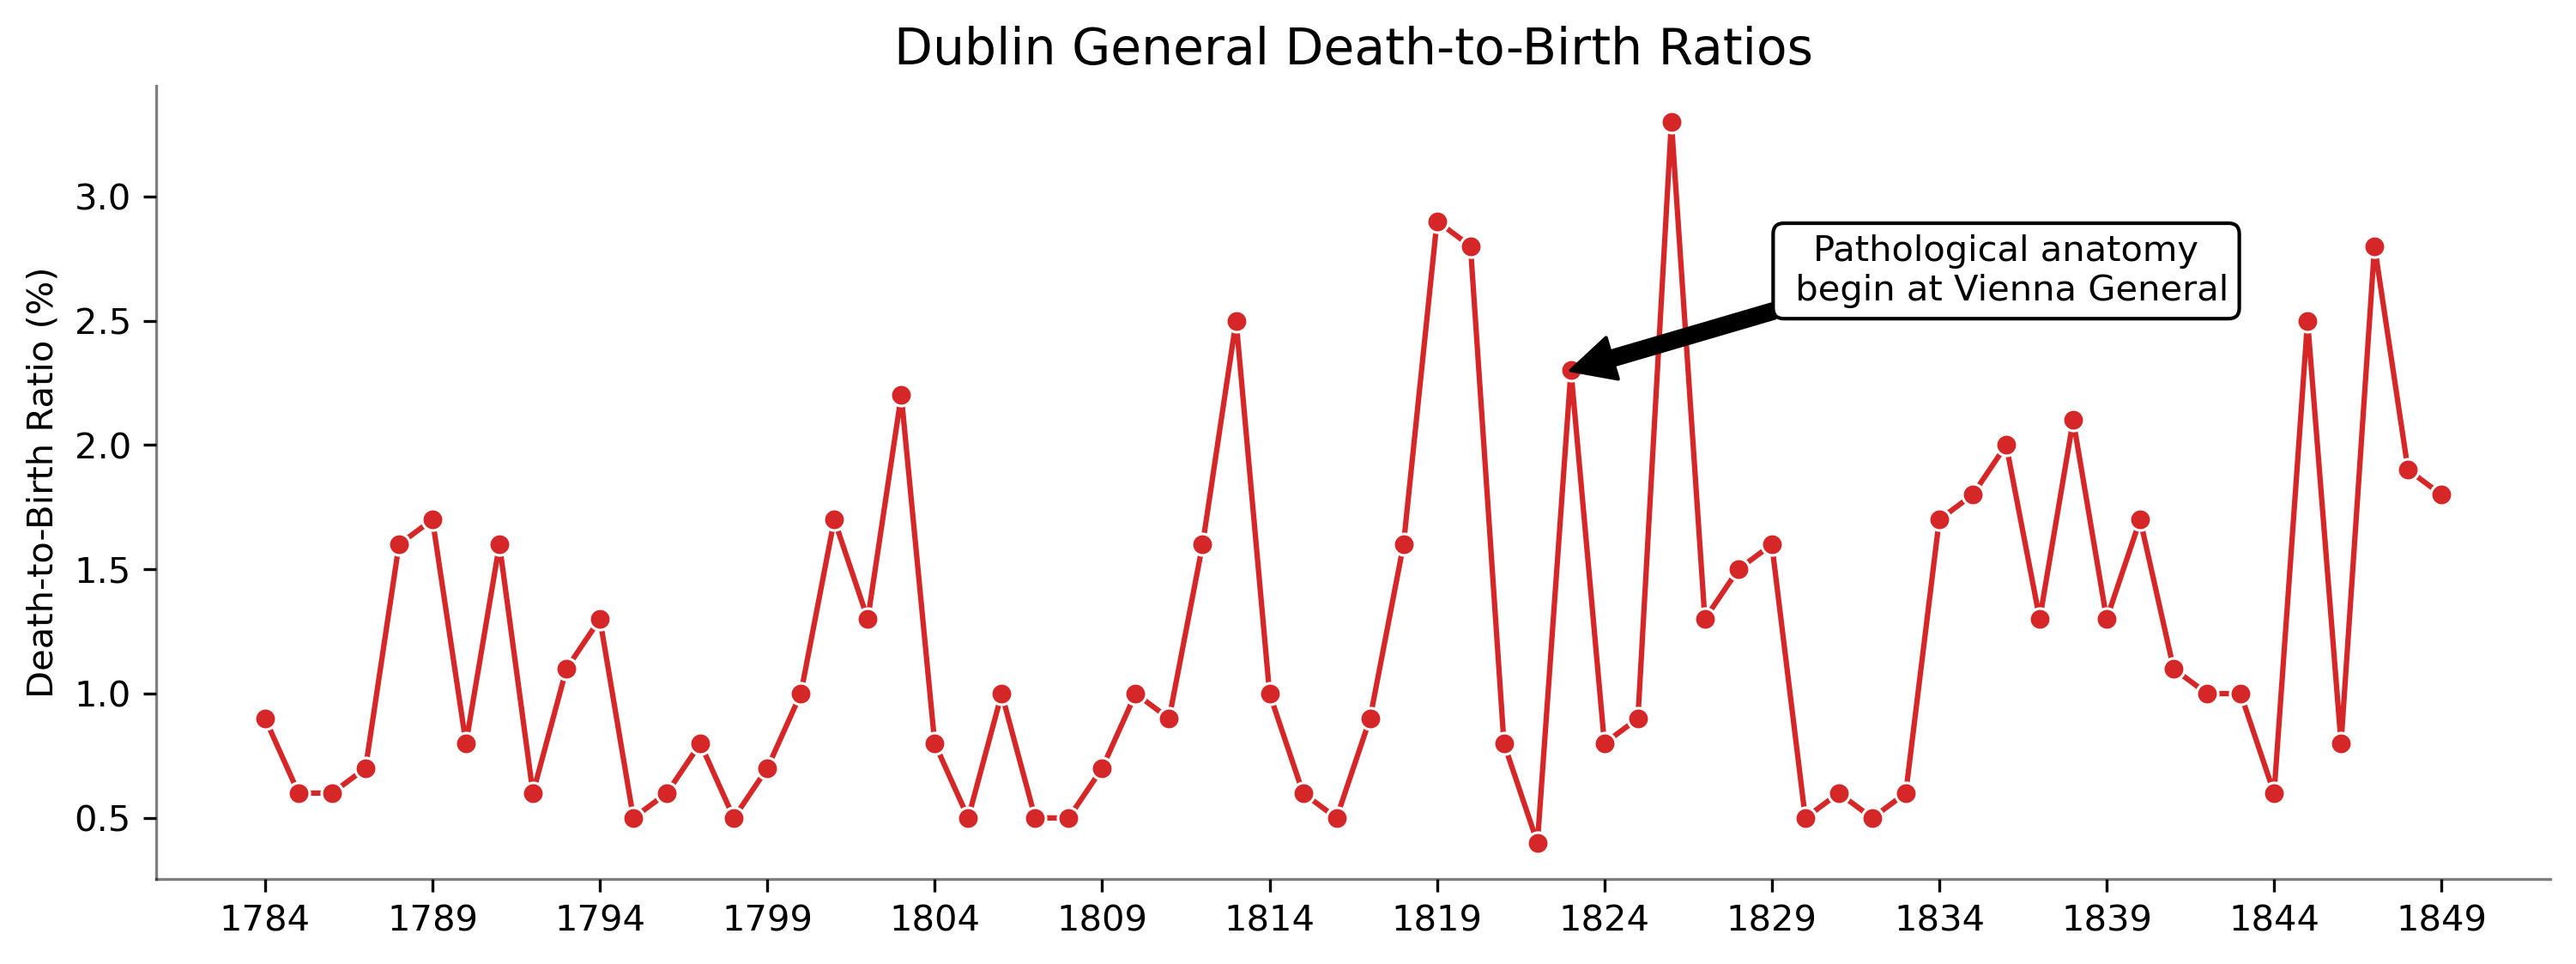

In [15]:
# Time series of Dublin death-to-birth ratios
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in line chart
sns.lineplot(dg_df, 
             x='Year', 
             y='Death-to-Birth Ratio', 
             marker='o', 
             color='tab:red')

# Annotation for pathological anatomy
ax.annotate("Pathological anatomy\n begin at Vienna General",
           xy=(39,2.3), 
            xytext=(52,2.7),
            ha='center',
            va='center',
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='Round'),
           arrowprops=dict(facecolor='black'),
           )

# Set the x-tick labels with increased intervals
labels = dg_df['Year']
tick_interval = 5  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Ratio (%)')
ax.set_xlabel('')

# Add title
plt.title('Dublin General Death-to-Birth Ratios', fontsize=14)

# Show plot
plt.show()

## Fig 11.5: Dublin time series with additional annotations

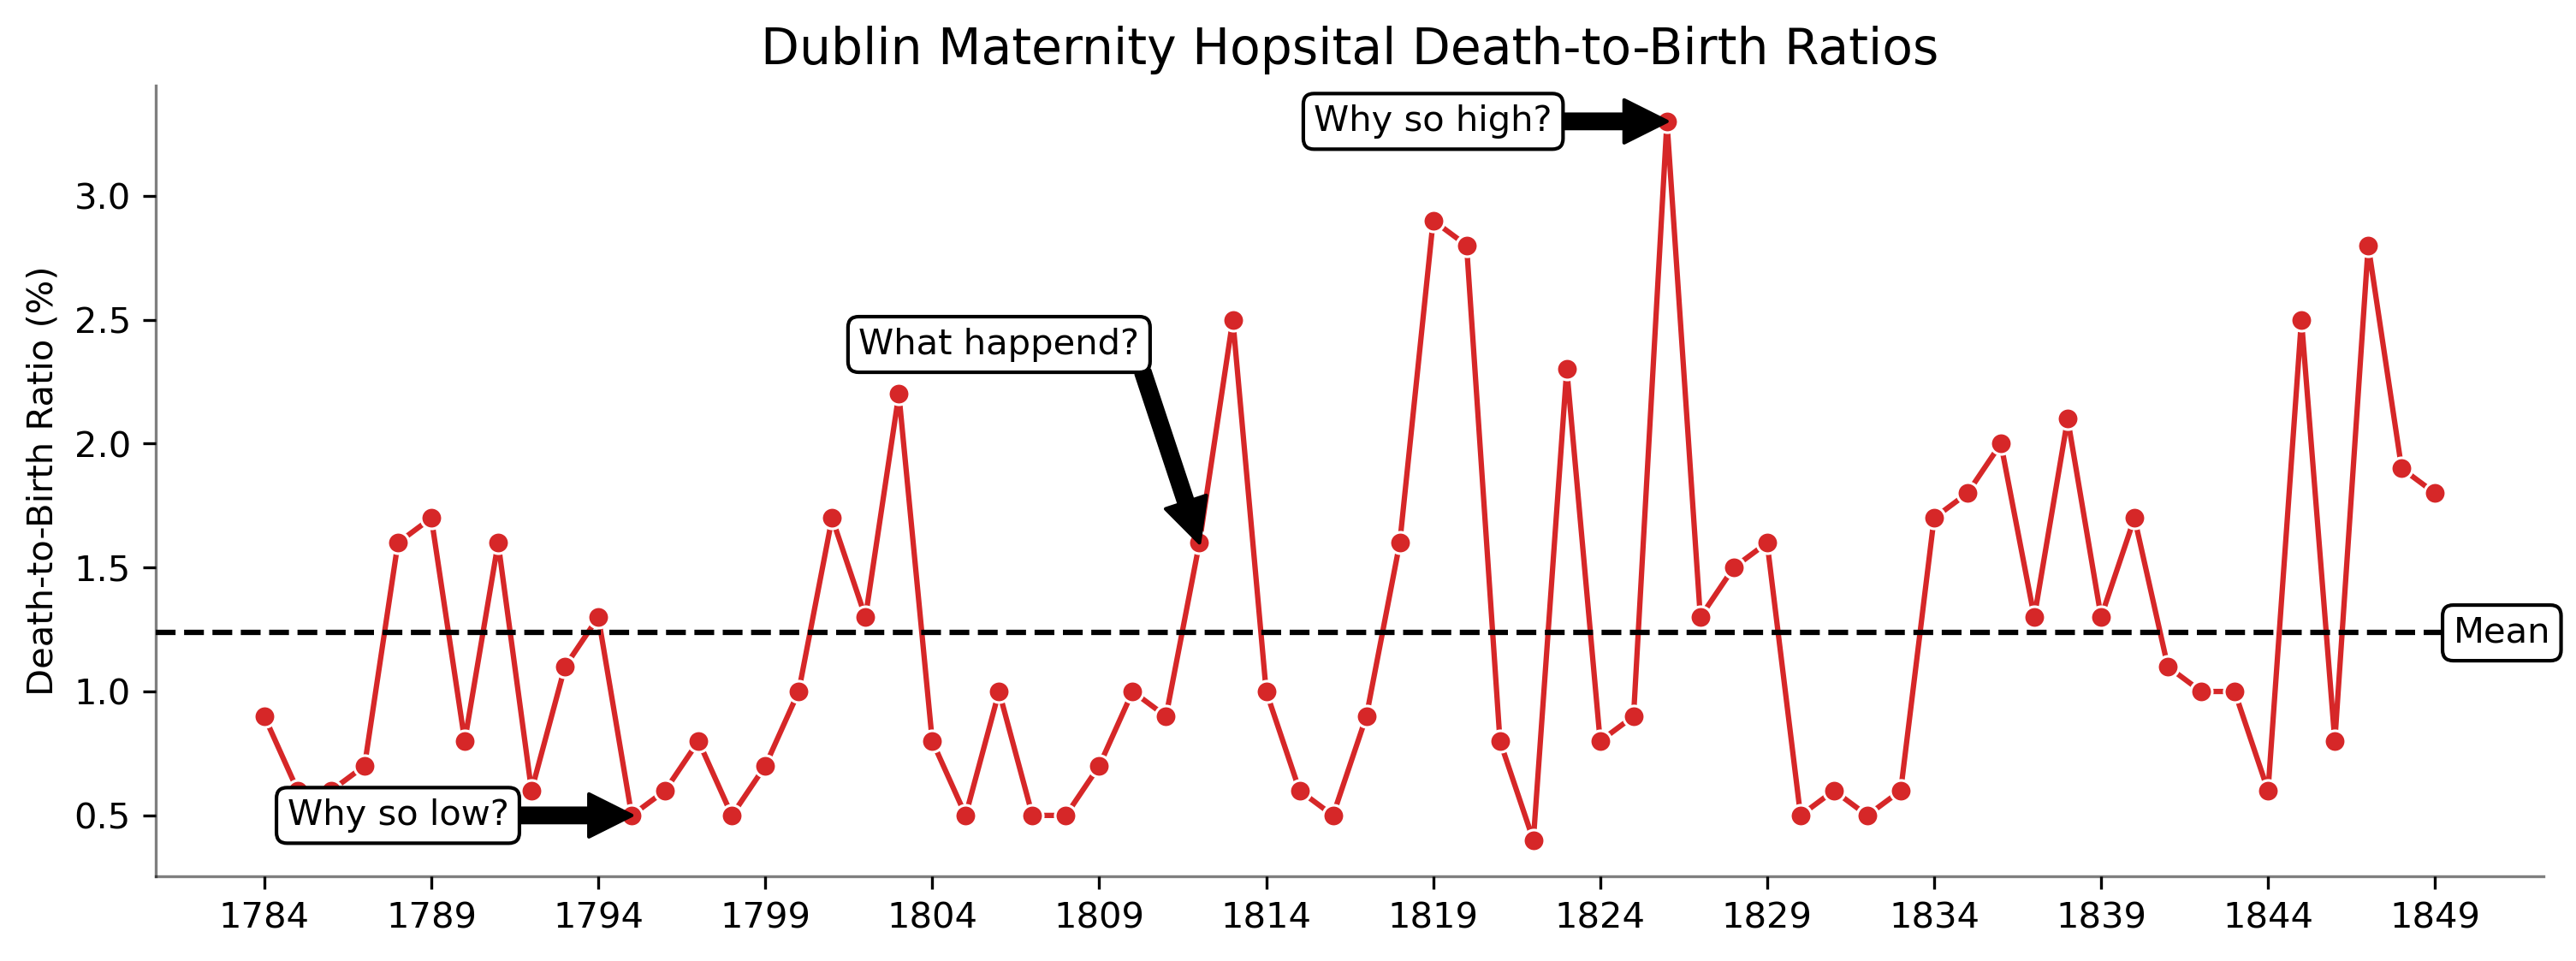

In [23]:
# Indivudal time series
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot the dublin data
sns.lineplot(dg_df, 
             x='Year', 
             y='Death-to-Birth Ratio', 
             marker='o', 
             color='tab:red')

# Add line a dataset mean
ax.axhline(round(dg_df['Death-to-Birth Ratio'].mean(),2), ls='--', color='black')

# Set the x-tick labels with increased intervals
labels = dg_df['Year']
tick_interval = 5  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Add title
plt.title('Dublin Maternity Hopsital Death-to-Birth Ratios', fontsize=14)

# Define details for annotations (text, xy-coordinates, xytext-coordinates)
annotations = [
    ('Why so low?', (11,0.5), (4,0.5)),
    ('Why so high?', (42,3.3), (35,3.3)),
    ('What happend?', (28,1.6), (22,2.4))
    ]

# Add annotations using a loop
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=10,
                bbox=dict(facecolor='white', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

ax.annotate("Mean",
            xy=(67,dg_df['Death-to-Birth Ratio'].mean()),
            ha='center',
            va='center',
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='Round'),
           )

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Ratio (%)')
ax.set_xlabel('')

# Show plot
plt.show()

## Fig 11.6: Dublin time series with line of best fit

This figure requires the line of best fit or trendline to first be calculated.

In [26]:
# Calculate trendline
x = np.arange(1,67)
y = dg_df['Death-to-Birth Ratio']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Extract coefficients
slope = coefficients[0]
intercept = coefficients[1]

# Print the equation of the line
print(f"The equation of the trendline is: y = {slope:.2f}x{intercept:.2f}")

The equation of the trendline is: y = 0.01x0.86


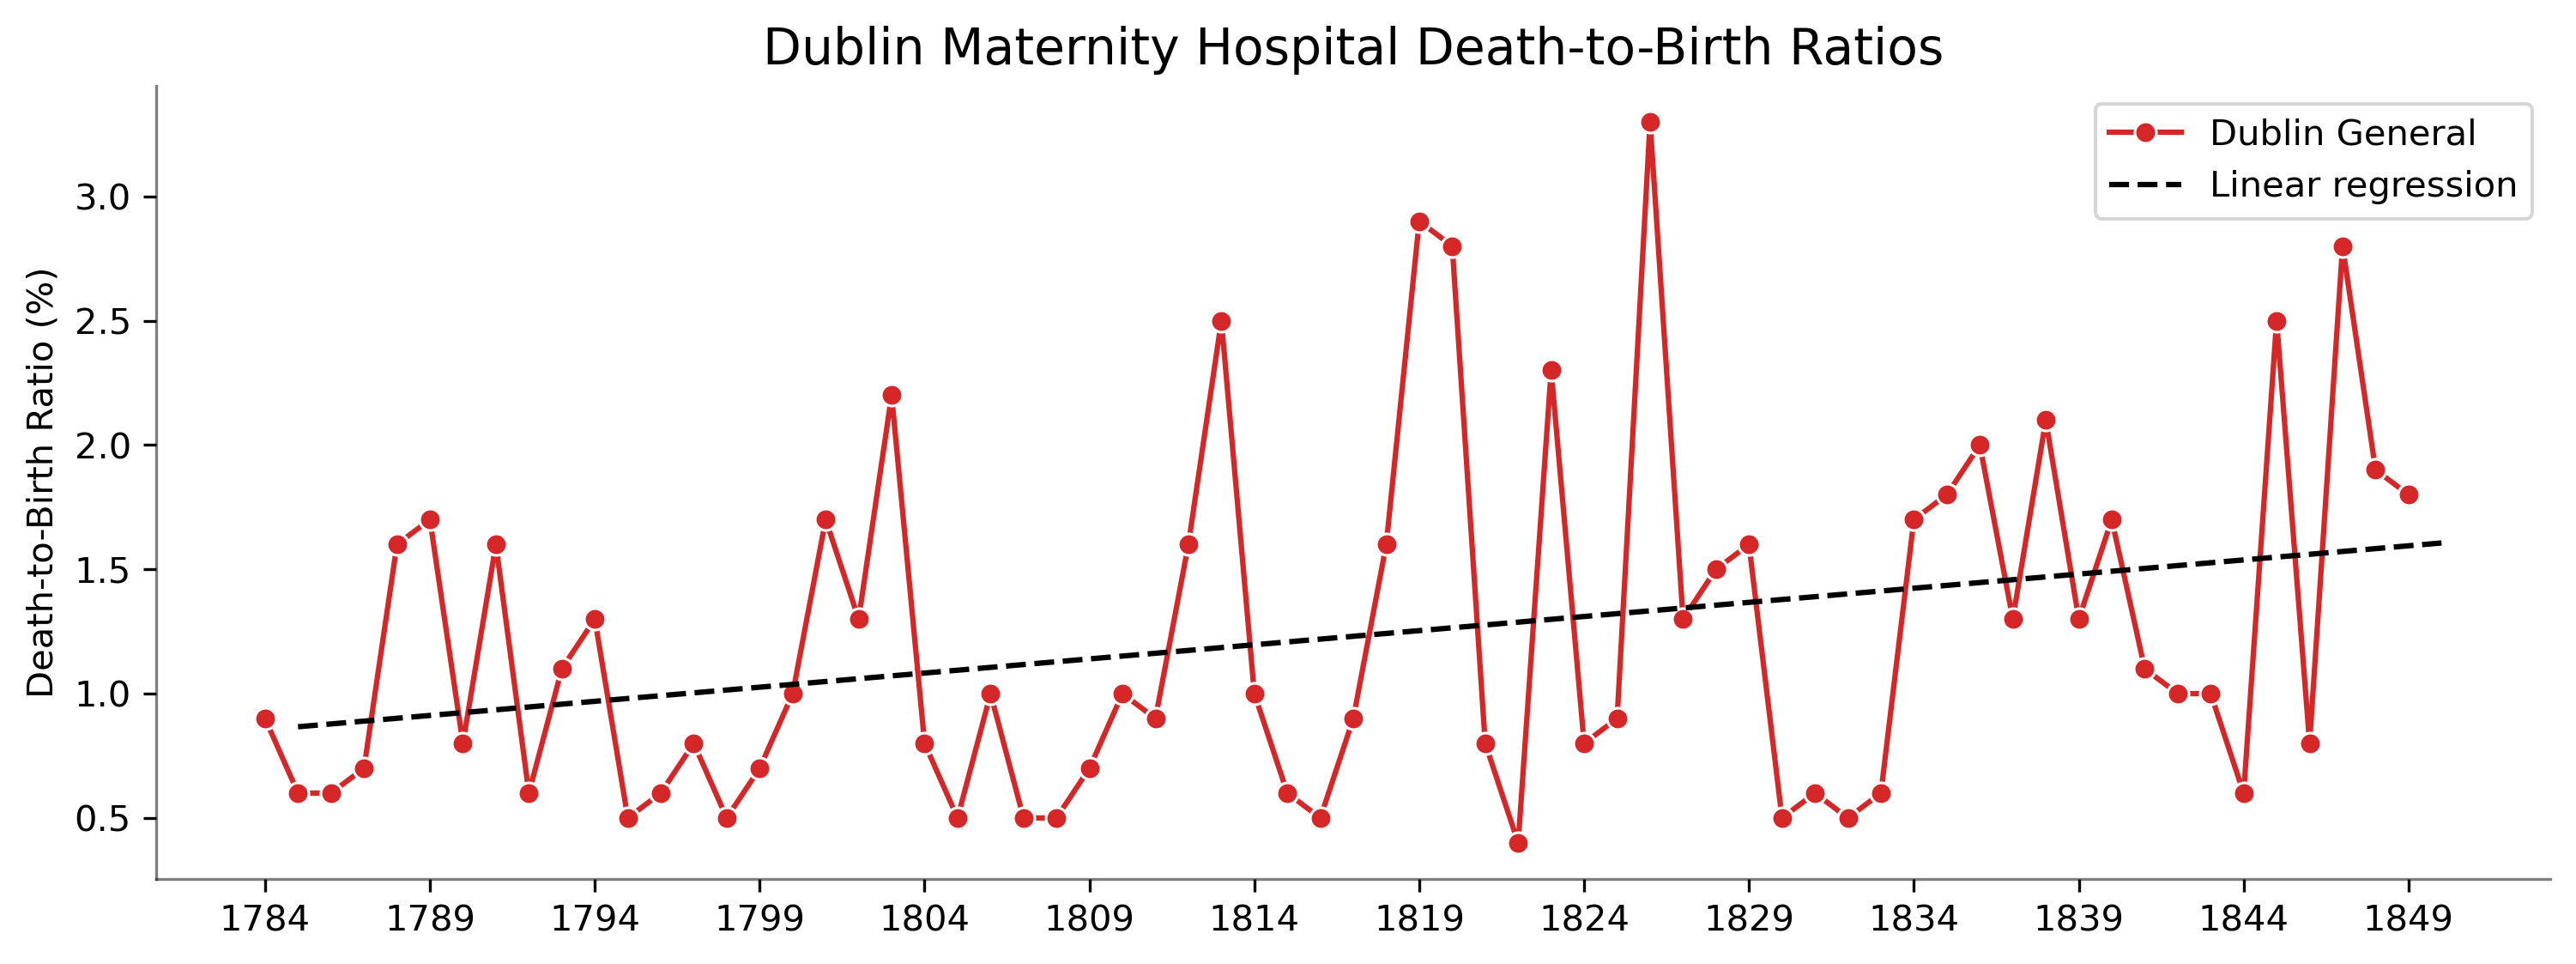

In [29]:
# Plot the data
fig, ax = plt.subplots(figsize=(12,4), dpi=300)
sns.lineplot(data=dg_df, 
             x='Year', 
             y='Death-to-Birth Ratio', 
             marker='o', 
             color='tab:red', 
             ax=ax, 
             label='Dublin General')

# Plot the trendline
ax.plot(x, trendline, color='black', linestyle='--', label='Linear regression')

# Set the x-tick labels with increased intervals
labels = dg_df['Year']
tick_interval = 5  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Add title
plt.title('Dublin Maternity Hospital Death-to-Birth Ratios', fontsize=14)
# Show legend
plt.legend()

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Ratio (%)')
ax.set_xlabel('')

# Show plot
plt.show()